<a href="https://colab.research.google.com/github/vsbca/Data-Science/blob/master/intro_to_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2017 Google LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Intro to pandas

**Learning Objectives:**
  * Gain an introduction to the `DataFrame` and `Series` data structures of the *pandas* library
  * Access and manipulate data within a `DataFrame` and `Series`
  * Import CSV data into a *pandas* `DataFrame`
  * Reindex a `DataFrame` to shuffle data

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

## Basic Concepts

The following line imports the *pandas* API and prints the API version:

In [1]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.1.5'

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [9]:
#Let's make a dataframe
import pandas as pd
import random
random.seed(3)
names = ["Jess", "Jordan", "Sandy", "Ted", "Barney", "Tyler"]
ages = [random.randint(18, 35) for x in range(len(names))]
people = {"names": names, "ages": ages}

#dataframe
df = pd.DataFrame.from_dict(people)
print(df)

    names  ages
0    Jess    25
1  Jordan    35
2   Sandy    22
3     Ted    29
4  Barney    33
5   Tyler    20


#Indexing by Column
Accessing data by a column is the same as accessing data from a dictionary with the key. Within the first set of brackets, you put the column name that you would like to access. If you’d like to access a specific record within that column, you use a second set of brackets with the index:


In [10]:
#directly selecting a column in Pandas
print(df["ages"])
print(df["ages"][3]) #Select the value of "ages" in the fourth row

0    25
1    35
2    22
3    29
4    33
5    20
Name: ages, dtype: int64
29


#Indexing by Record
###When you need to access an entire record, you must use loc. This allows us to specify the record location via the index. Let’s access the entire first record, then the name within that record:


In [11]:
#directly selecting a record in Pandas using .loc
print( df.loc[0] )
print( df.loc[0]["names"] )        # selecting the value at record 0 in the "names" column

names    Jess
ages       25
Name: 0, dtype: object
Jess


#Slicing a DataFrame
###When you want to access a specific number of records, you must slice the DataFrame. Slicing in Pandas works the exact same way as a Python list does, using start, stop, and step within a set of brackets. Let’s access the records from index 2 up to 5:


In [12]:
#slicing a Dataframe to grab specific records
print(df[2:5])

    names  ages
2   Sandy    22
3     Ted    29
4  Barney    33


#Build in Method
##head

In [13]:
#accessiong the top 5 records using .head()
df.head()

,names,ages
0,Jess,25
1,Jordan,35
2,Sandy,22
3,Ted,29
4,Barney,33


#tail()

In [14]:
#accessing the bottom 3 records using .tail()
df.tail(3)

,names,ages
3,Ted,29
4,Barney,33
5,Tyler,20


#Keys()
###Sometimes you’ll need the column names. Whether you’re making a modular script or analyzing the data you’re working with, using the keys( ) method will help:


#Indexing by Column
###Accessing data by a column is the same as accessing data from a dictionary with the key. Within the first set of brackets, you put the column name that you would like to access. 

In [16]:
headers = df.keys
headers

<bound method NDFrame.keys of     names  ages
0    Jess    25
1  Jordan    35
2   Sandy    22
3     Ted    29
4  Barney    33
5   Tyler    20>

#.shape
The shape of a DataFrame descrive the number of records by the number of columns. It's always important to check the shape to ensure you're working with the proper amout of data

In [17]:
df.shape

(6, 2)

#describe()
####The describe method will give you a base analysis for all numerical data. You’ll be able to view min, max, 25%, 50%, mean, etc., on all columns just by calling this method on the DataFrame. This information is helpful to start your analysis but generally won’t answer those questions you’re looking for. Instead, we can use this method as a guideline of where to start:


In [18]:
df.describe()

,ages
count,6.000000
mean,27.333333
std,6.022181
min,20.000000
25%,22.750000
50%,27.000000
75%,32.000000
max,35.000000


#sort_values()
When you need to sort a DataFrame based on column information, you use this method. You can pass in one or multiple columns to be sorted by. When passing multiple, you must pass them in as a list of column names.

In [19]:
df.sort_values("ages")

,names,ages
5,Tyler,20
2,Sandy,22
0,Jess,25
3,Ted,29
4,Barney,33
1,Jordan,35


#Filtration
###Let's look at how to filter DataFrame for information that meets a specific condition

##<b>Conditionals
###Rather than filtering out information, we can create a boolean data type column that represents the condition we’re checking. Let’s take our current DataFrame and write a condition that shows those who are 21 or older and can drink:


In [20]:
can_drink = df["ages"] > 21
can_drink

0     True
1     True
2     True
3     True
4     True
5    False
Name: ages, dtype: bool

#<b>Subsetting
###When you need to filter out records but retain the information within the DataFrame you need to use a concept called subsetting. We’ll use the same condition as earlier, except this time we’ll use it to filter out records rather than create a true-false representation:


In [22]:
df[df["ages"] > 25]

,names,ages
1,Jordan,35
3,Ted,29
4,Barney,33


In [7]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [4]:
df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [6]:
#Show top 5 rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa095288f98>]],
      dtype=object)

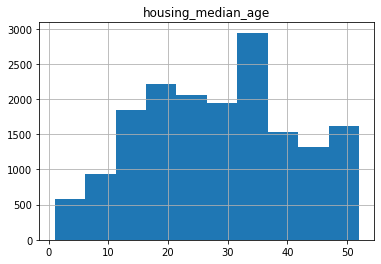

In [ ]:
#histogram
df.hist('housing_median_age')

## Accessing Data

You can access `DataFrame` data using familiar Python dict/list operations:

In [ ]:
#List all the columns
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
df["total_bedrooms"]

0        1283.0
1        1901.0
2         174.0
3         337.0
4         326.0
          ...  
16995     394.0
16996     528.0
16997     531.0
16998     552.0
16999     300.0
Name: total_bedrooms, Length: 17000, dtype: float64

In [ ]:
print(type(cities[0:2]))
cities[0:2]

In addition, *pandas* provides an extremely rich API for advanced [indexing and selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html) that is too extensive to be covered here.

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [ ]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

[NumPy](http://www.numpy.org/) is a popular toolkit for scientific computing. *pandas* `Series` can be used as arguments to most NumPy functions:

In [ ]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

For more complex single-column transformations, you can use `Series.apply`. Like the Python [map function](https://docs.python.org/2/library/functions.html#map), 
`Series.apply` accepts as an argument a [lambda function](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), which is applied to each value.

The example below creates a new `Series` that indicates whether `population` is over one million:

In [ ]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

In [ ]:
population.head()

0     852469
1    1015785
2     485199
dtype: int64


Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

In [ ]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


## Exercise #1

Modify the `cities` table by adding a new boolean column that is True if and only if *both* of the following are True:

  * The city is named after a saint.
  * The city has an area greater than 50 square miles.

**Note:** Boolean `Series` are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing *logical and*, use `&` instead of `and`.

**Hint:** "San" in Spanish means "saint."

In [ ]:
# Your code here

### Solution

Click below for a solution.

In [ ]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

## Indexes
Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row. 

By default, at construction, *pandas* assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [ ]:
city_names.index

In [ ]:
cities.index

Call `DataFrame.reindex` to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [ ]:
cities.reindex([2, 0, 1])

Reindexing is a great way to shuffle (randomize) a `DataFrame`. In the example below, we take the index, which is array-like, and pass it to NumPy's `random.permutation` function, which shuffles its values in place. Calling `reindex` with this shuffled array causes the `DataFrame` rows to be shuffled in the same way.
Try running the following cell multiple times!

In [ ]:
cities.reindex(np.random.permutation(cities.index))

For more information, see the [Index documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

## Exercise #2

The `reindex` method allows index values that are not in the original `DataFrame`'s index values. Try it and see what happens if you use such values! Why do you think this is allowed?

In [ ]:
# Your code here

### Solution

Click below for the solution.

If your `reindex` input array includes values not in the original `DataFrame` index values, `reindex` will add new rows for these "missing" indices and populate all corresponding columns with `NaN` values:

In [ ]:
cities.reindex([0, 4, 5, 2])

This behavior is desirable because indexes are often strings pulled from the actual data (see the [*pandas* reindex
documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html) for an example
in which the index values are browser names).

In this case, allowing "missing" indices makes it easy to reindex using an external list, as you don't have to worry about
sanitizing the input.